In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, classification_report
import seaborn as sns
from datetime import datetime
import math

In [3]:
#reading in data

In [4]:
training_data = pd.read_csv("training_dataset.csv")

C:\Users\91850\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,9,10,11,13,14,16,27,28,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
training_data.head()

,train_file.csv,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [6]:
training_data.rename(columns={'Custom field (train_file.csv)': 'Custom field (ID)'}, inplace=True)

In [7]:
training_data.head()

,train_file.csv,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [8]:
training_data.rename(columns={'train_file.csv': 'ID'}, inplace=True)

In [9]:
training_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [10]:
training_data.shape

(143142, 32)

In [11]:
print(training_data.iloc[[100000]])

                    ID LICENSE ID ACCOUNT NUMBER SITE NUMBER  \
100000  11878-20040216    1452858          26884           1   

                     LEGAL NAME DOING BUSINESS AS NAME  \
100000  RICHARD & JAMES COLEMAN  COLEMAN'S BARBER SHOP   

                        ADDRESS     CITY STATE ZIP CODE  ...  \
100000  6802 S STONY ISLAND AVE  CHICAGO    IL  60649.0  ...   

       LICENSE TERM START DATE LICENSE TERM EXPIRATION DATE  \
100000     2004-02-16T00:00:00          2005-02-15T00:00:00   

       LICENSE APPROVED FOR ISSUANCE          DATE ISSUED  \
100000           2003-12-22T00:00:00  2004-02-13T00:00:00   

       LICENSE STATUS CHANGE DATE   SSA   LATITUDE  LONGITUDE  \
100000                        NaN  42.0  41.771366 -87.586426   

                                                 LOCATION LICENSE STATUS  
100000  {'latitude': '41.77136592253511', 'longitude':...            NaN  

[1 rows x 32 columns]


In [12]:
test_data= training_data[training_data["LICENSE STATUS"] == 'NaN']

In [13]:
test_data.shape

(0, 32)

In [14]:
training_data.tail()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
143137,2032383-20160716,2465962.0,63376.0,180.0,INTERPARK LLC,INTERPARK,505 N STATE ST 2-4,CHICAGO,IL,60654.0,...,2016-07-16T00:00:00,2018-07-15T00:00:00,2016-06-23T00:00:00,2016-08-11T00:00:00,2018-01-09T00:00:00,NaN,41.891055,-87.627898,"{'latitude': '41.89105524147196', 'longitude':...",NaN
143138,40376-20020216,1211199.0,55051.0,1.0,YUN HEE HWANG,TOP CLEANERS,1201 W ROSCOE ST 1ST,CHICAGO,IL,60657.0,...,2002-02-16T00:00:00,2003-02-15T00:00:00,2002-01-18T00:00:00,2002-01-22T00:00:00,NaN,NaN,41.943382,-87.659191,"{'latitude': '41.94338183750669', 'longitude':...",NaN
143139,2064176-20121116,2188497.0,357381.0,1.0,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,7052 W 64TH ST 1ST,CHICAGO,IL,60638.0,...,2012-11-16T00:00:00,2014-11-15T00:00:00,2012-12-25T00:00:00,2012-12-26T00:00:00,2012-12-29T00:00:00,NaN,41.77571,-87.798009,"{'latitude': '41.775709631013335', 'longitude'...",NaN
143140,1954052-20090202,1954052.0,340610.0,1.0,maria t bedoy,mari's cleaning services,4544 S CHRISTIANA AVE 1,CHICAGO,IL,60632.0,...,2009-02-02T00:00:00,2009-06-15T00:00:00,2009-01-31T00:00:00,2009-02-02T00:00:00,NaN,39.0,41.810523,-87.707872,"{'latitude': '41.81052250782054', 'longitude':...",NaN
143141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test_data=training_data[training_data['LICENSE STATUS'].isna()]

In [16]:
test_data.shape

(57247, 32)

In [17]:
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
85895,NaN,LICENSE STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85896,1985799-20091116,AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85897,1932144-20090416,AAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85898,71173-20100816,REV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85899,1802721-20110616,REV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(training_data.iloc[[85895]])

        ID      LICENSE ID ACCOUNT NUMBER SITE NUMBER LEGAL NAME  \
85895  NaN  LICENSE STATUS            NaN         NaN        NaN   

      DOING BUSINESS AS NAME ADDRESS CITY STATE ZIP CODE  ...  \
85895                    NaN     NaN  NaN   NaN      NaN  ...   

      LICENSE TERM START DATE LICENSE TERM EXPIRATION DATE  \
85895                     NaN                          NaN   

      LICENSE APPROVED FOR ISSUANCE DATE ISSUED LICENSE STATUS CHANGE DATE  \
85895                           NaN         NaN                        NaN   

       SSA LATITUDE LONGITUDE LOCATION LICENSE STATUS  
85895  NaN      NaN       NaN      NaN            NaN  

[1 rows x 32 columns]


In [19]:
print(training_data.iloc[[120000]])

                      ID LICENSE ID ACCOUNT NUMBER SITE NUMBER  \
120000  1594558-20050428    1594558         290815           1   

               LEGAL NAME DOING BUSINESS AS NAME           ADDRESS     CITY  \
120000  RODOLFO MANJARREZ      RODOPFO MANJARREZ  2100 N LAMON AVE  CHICAGO   

       STATE ZIP CODE  ... LICENSE TERM START DATE  \
120000    IL  60639.0  ...     2005-04-28T00:00:00   

       LICENSE TERM EXPIRATION DATE LICENSE APPROVED FOR ISSUANCE  \
120000          2006-02-15T00:00:00                           NaN   

                DATE ISSUED LICENSE STATUS CHANGE DATE  SSA   LATITUDE  \
120000  2005-04-28T00:00:00                        NaN  NaN  41.918768   

        LONGITUDE                                           LOCATION  \
120000 -87.748771  {'latitude': '41.91876792774532', 'longitude':...   

       LICENSE STATUS  
120000            NaN  

[1 rows x 32 columns]


In [20]:
test_data=training_data.iloc[ 85902:, : ]

In [21]:
test_data.shape

(57240, 32)

In [22]:
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
85902,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610,...,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047249,-87.63746738200001,"{'latitude': '41.89004724888915', 'longitude':...",NaN
85903,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485236,-87.67666544299999,"{'latitude': '41.786485235679486', 'longitude'...",NaN
85904,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605,...,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269248000004,-87.62569455100001,"{'latitude': '41.86826924843568', 'longitude':...",NaN
85905,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827,...,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655761751,-87.608685771,"{'latitude': '41.65576175146191', 'longitude':...",NaN
85906,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632,...,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.8169691,-87.699784861,"{'latitude': '41.81696910012824', 'longitude':...",NaN


In [23]:
train_data=training_data.iloc[ 0:85895, : ]

In [24]:
train_data.shape

(85895, 32)

In [25]:
#After dropping the last row of test_data since it was all null
test_data.shape

(57240, 32)

In [26]:
test_data.tail()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
143137,2032383-20160716,2465962.0,63376.0,180.0,INTERPARK LLC,INTERPARK,505 N STATE ST 2-4,CHICAGO,IL,60654.0,...,2016-07-16T00:00:00,2018-07-15T00:00:00,2016-06-23T00:00:00,2016-08-11T00:00:00,2018-01-09T00:00:00,NaN,41.891055,-87.627898,"{'latitude': '41.89105524147196', 'longitude':...",NaN
143138,40376-20020216,1211199.0,55051.0,1.0,YUN HEE HWANG,TOP CLEANERS,1201 W ROSCOE ST 1ST,CHICAGO,IL,60657.0,...,2002-02-16T00:00:00,2003-02-15T00:00:00,2002-01-18T00:00:00,2002-01-22T00:00:00,NaN,NaN,41.943382,-87.659191,"{'latitude': '41.94338183750669', 'longitude':...",NaN
143139,2064176-20121116,2188497.0,357381.0,1.0,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,7052 W 64TH ST 1ST,CHICAGO,IL,60638.0,...,2012-11-16T00:00:00,2014-11-15T00:00:00,2012-12-25T00:00:00,2012-12-26T00:00:00,2012-12-29T00:00:00,NaN,41.77571,-87.798009,"{'latitude': '41.775709631013335', 'longitude'...",NaN
143140,1954052-20090202,1954052.0,340610.0,1.0,maria t bedoy,mari's cleaning services,4544 S CHRISTIANA AVE 1,CHICAGO,IL,60632.0,...,2009-02-02T00:00:00,2009-06-15T00:00:00,2009-01-31T00:00:00,2009-02-02T00:00:00,NaN,39.0,41.810523,-87.707872,"{'latitude': '41.81052250782054', 'longitude':...",NaN
143141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_data=test_data.reset_index()

In [28]:
test_data.shape

(57240, 33)

In [29]:
test_data=test_data.drop(['index','LICENSE STATUS'], axis = 1)

In [30]:
test_data.drop(test_data.tail(1).index,inplace=True)

In [31]:
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047249,-87.63746738200001,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485236,-87.67666544299999,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269248000004,-87.62569455100001,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655761751,-87.608685771,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.8169691,-87.699784861,"{'latitude': '41.81696910012824', 'longitude':..."


In [32]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [33]:
my_submission.shape

(57239, 1)

In [34]:
# target variable distribution
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [35]:
#Analyse the training data
train_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [36]:
#to find the number of unique elements in training data
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       41365
SITE NUMBER                            238
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              1997
WARD                                   100
PRECINCT                               147
WARD PRECINCT                         2383
POLICE DISTRICT                         51
LICENSE CODE                           177
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       51861
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [37]:
#Analyse the testing data
test_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [38]:
#to find the number of unique elements in testing data
test_data.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       40776
SITE NUMBER                            430
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               597
WARD                                   100
PRECINCT                               151
WARD PRECINCT                         2461
POLICE DISTRICT                         48
LICENSE CODE                           227
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       51457
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

In [39]:
# Dropping useless columns
column_list = ['ID','LICENSE ID','ADDRESS','APPLICATION CREATED DATE', 'SSA', 'LOCATION']
train_data = train_data.drop(column_list, axis=1)
test_data = test_data.drop(column_list, axis=1)

In [40]:
# Extracting year and month from datetime data
def convert_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [41]:
date_list = ['PAYMENT DATE','LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED','LICENSE STATUS CHANGE DATE','APPLICATION REQUIREMENTS COMPLETE' ]
convert_date(date_list)

In [42]:
# Filling in the missing data for train_data
train_data['LATITUDE']=pd.to_numeric(train_data['LATITUDE'])
train_data['LONGITUDE']=pd.to_numeric(train_data['LONGITUDE'])
test_data['LATITUDE']=pd.to_numeric(test_data['LATITUDE'])
test_data['LONGITUDE']=pd.to_numeric(test_data['LONGITUDE'])

train_data['LATITUDE']=train_data['LATITUDE'].fillna((train_data['LATITUDE'].mean()))
train_data['LONGITUDE']=train_data['LONGITUDE'].fillna((train_data['LONGITUDE'].mean()))

In [43]:
# Filling in the missing data for test_data
test_data['LATITUDE']=test_data['LATITUDE'].fillna((test_data['LATITUDE'].mean()))
test_data['LONGITUDE']=test_data['LONGITUDE'].fillna((test_data['LONGITUDE'].mean()))

In [44]:
# Obtaining year and month from datetime data
def get_year(columnname, dfcolumnname):
    train_data[columnname] = train_data[dfcolumnname].apply(lambda x:x.year)
    test_data[columnname] = test_data[dfcolumnname].apply(lambda x:x.year)
def get_month(columnname, dfcolumnname):
    train_data[columnname] = train_data[dfcolumnname].apply(lambda x:x.month)
    test_data[columnname] = test_data[dfcolumnname].apply(lambda x:x.month)

In [45]:
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_month('PAYMENT MONTH', 'PAYMENT DATE')
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('DATE ISSUED YEAR', 'DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [46]:
# Filling in the missing data for train_data by rounded value of mean
def round_mean(impute_mean_list):
    for i in impute_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [47]:
impute_mean_list = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
round_mean(impute_mean_list)

In [48]:
#calculating liscense validity
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [49]:
# Dropping useless columns
column_list=['APPLICATION REQUIREMENTS COMPLETE','PAYMENT DATE','LICENSE TERM EXPIRATION DATE','LICENSE TERM EXPIRATION YEAR', 'DATE ISSUED', 'LICENSE TERM START DATE', 'LICENSE TERM START YEAR', 
            'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
train_data = train_data.drop(column_list, axis=1)
test_data = test_data.drop(column_list, axis=1)

In [50]:
# Filling in the missing data with None
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].fillna('None')
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].fillna('None')
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].fillna('None')
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].fillna('None')

In [51]:
#Capitalizing 
train_data['LEGAL NAME']=train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME']=train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data['LEGAL NAME']=test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME']=test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())

In [52]:
test_data.tail()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
57234,266103.0,3.0,"GOODHEALTH MEDICAL PRODUCTS, INC.","GOODHEALTH MEDICAL PRODUCTS, INC.",CHICAGO,IL,60652.0,18.0,14.0,18-14,...,N,41.749842,-87.688733,2007.0,9.0,2007.0,2007,2007.0,2008.0,2.0
57235,63376.0,180.0,INTERPARK LLC,INTERPARK,CHICAGO,IL,60654.0,42.0,22.0,42-22,...,N,41.891055,-87.627898,2016.0,6.0,2016.0,2016,2016.0,2018.0,2.0
57236,55051.0,1.0,YUN HEE HWANG,TOP CLEANERS,CHICAGO,IL,60657.0,44.0,9.0,44-9,...,N,41.943382,-87.659191,2002.0,1.0,2001.0,2002,2002.0,2009.0,1.0
57237,357381.0,1.0,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,CHICAGO,IL,60638.0,23.0,18.0,23-18,...,N,41.775710,-87.798009,2012.0,12.0,2012.0,2012,2012.0,2012.0,2.0
57238,340610.0,1.0,MARIA T BEDOY,MARI'S CLEANING SERVICES,CHICAGO,IL,60632.0,14.0,10.0,14-10,...,N,41.810523,-87.707872,2009.0,1.0,2009.0,2009,2009.0,2009.0,0.0


In [53]:
# Modifying LEGAL NAME and DOING BUSINESS AS NAME
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [54]:
#creating column LEGAL TYPE
train_data['LEGAL TYPE'] = 'PVT'
test_data['LEGAL TYPE'] = 'PVT'

In [55]:
#Populating LEGAL TYPE
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])

In [56]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])

In [57]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])

In [58]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])

In [59]:
#dropping useless columns
train_data = train_data.drop(['DOING BUSINESS AS NAME', 'LEGAL NAME'], axis=1)
test_data = test_data.drop(['DOING BUSINESS AS NAME', 'LEGAL NAME'], axis=1)

In [60]:
#distribution of LEGAL TYPE
train_data['LEGAL TYPE'].value_counts()

CORP    29158
INC     25805
PVT     24319
LLC      4875
LTD      1738
Name: LEGAL TYPE, dtype: int64

In [61]:
test_data['LEGAL TYPE'].value_counts()

INC     20003
PVT     16836
CORP    13920
LLC      4927
LTD      1553
Name: LEGAL TYPE, dtype: int64

In [62]:
#using LICENSE DESCRIPTION
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [63]:
#using LICENSE DESCRIPTION in train_data previously and now in test_data
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

C:\Users\91850\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


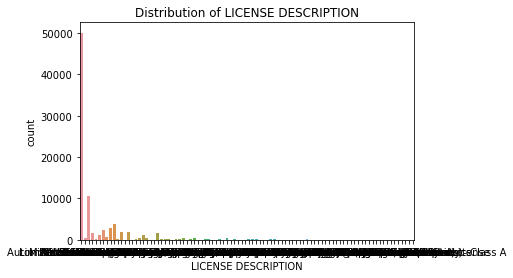

In [64]:
#distribution of LICENSE DESCRIPTION in train_data
plt.title('Distribution of LICENSE DESCRIPTION')
sns.countplot(train_data['LICENSE DESCRIPTION'])
plt.show()

In [65]:
test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License           28094
Retail Food Establishment           4788
Home Occupation                     3021
Tobacco                             2426
Home Repair                         1860
                                   ...  
License Manager                        1
Shared Housing Unit Operator           1
Transportation Network Provider        1
Bicycle Messenger Service              1
Private Booting Operation              1
Name: LICENSE DESCRIPTION, Length: 111, dtype: int64

In [66]:
#filling in None for ZIP CODE with no values
train_data['ZIP CODE'] = train_data['ZIP CODE'].fillna('None')
test_data['ZIP CODE'] = test_data['ZIP CODE'].fillna('None')

In [67]:
#filling with 0
def fill_nil(fill_nil_list):
    for i in fill_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)
        
fill_nil_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'PAYMENT MONTH', 'WARD PRECINCT', 'LICENSE NUMBER']
fill_nil(fill_nil_list)

In [68]:
#Encoding all values so as to make analyzing easy while implementing model

train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

In [69]:
# Giving labels to non numerical values
def use_dummy(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [70]:
train_data = use_dummy(train_data)
test_data = use_dummy(test_data)

ACCOUNT NUMBER encoded
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
SITE NUMBER encoded
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
CITY encoded


<ipython-input-69-bcd366e7aae5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][mask] = label_encoder.fit_transform(df[i][mask])


STATE encoded
ZIP CODE encoded
WARD encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
PRECINCT encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
WARD PRECINCT encoded
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
POLICE DISTRICT encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
LICENSE CODE encoded
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
LICENSE DESCRIPTION encoded
LICENSE NUMBER encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded
ACCOUNT NUMBER encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
SITE NUMBER encoded
Encoders require their input to be uniformly strings or numbers. Got ['f

In [71]:
encoder = LabelEncoder()
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))
encoder = LabelEncoder()
train_data["WARD PRECINCT"] = encoder.fit_transform(train_data["WARD PRECINCT"].astype(str))
test_data["WARD PRECINCT"] = encoder.fit_transform(test_data["WARD PRECINCT"].astype(str))

C:\Users\91850\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


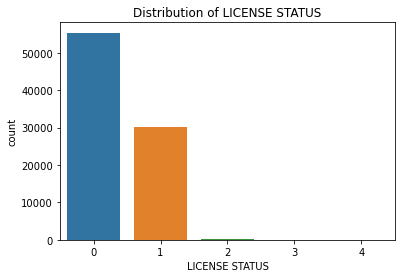

In [72]:
#distribution of LICENSE STATUS in training data
plt.title('Distribution of LICENSE STATUS')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [73]:
train_data["LICENSE STATUS"].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [74]:
#sampling is done so as to train our model on a very balanced data

#shuffling
train_data = train_data.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df = train_data[train_data['LICENSE STATUS'] == 4]
pending_df = train_data[train_data['LICENSE STATUS'] == 3]
accepted_df = train_data[train_data['LICENSE STATUS'] == 2]

non_fraud_df = train_data[train_data['LICENSE STATUS'] == 1][:290]
non_accepted_df = train_data[train_data['LICENSE STATUS'] == 0][:300]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df, fraud_df,
                                  fraud_df, fraud_df, fraud_df, pending_df, pending_df, fraud_df, pending_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

C:\Users\91850\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


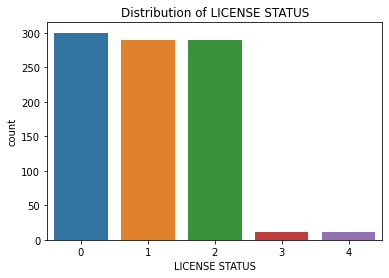

In [75]:
#count of LICENSE STATUS NOW
plt.title('Distribution of LICENSE STATUS')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

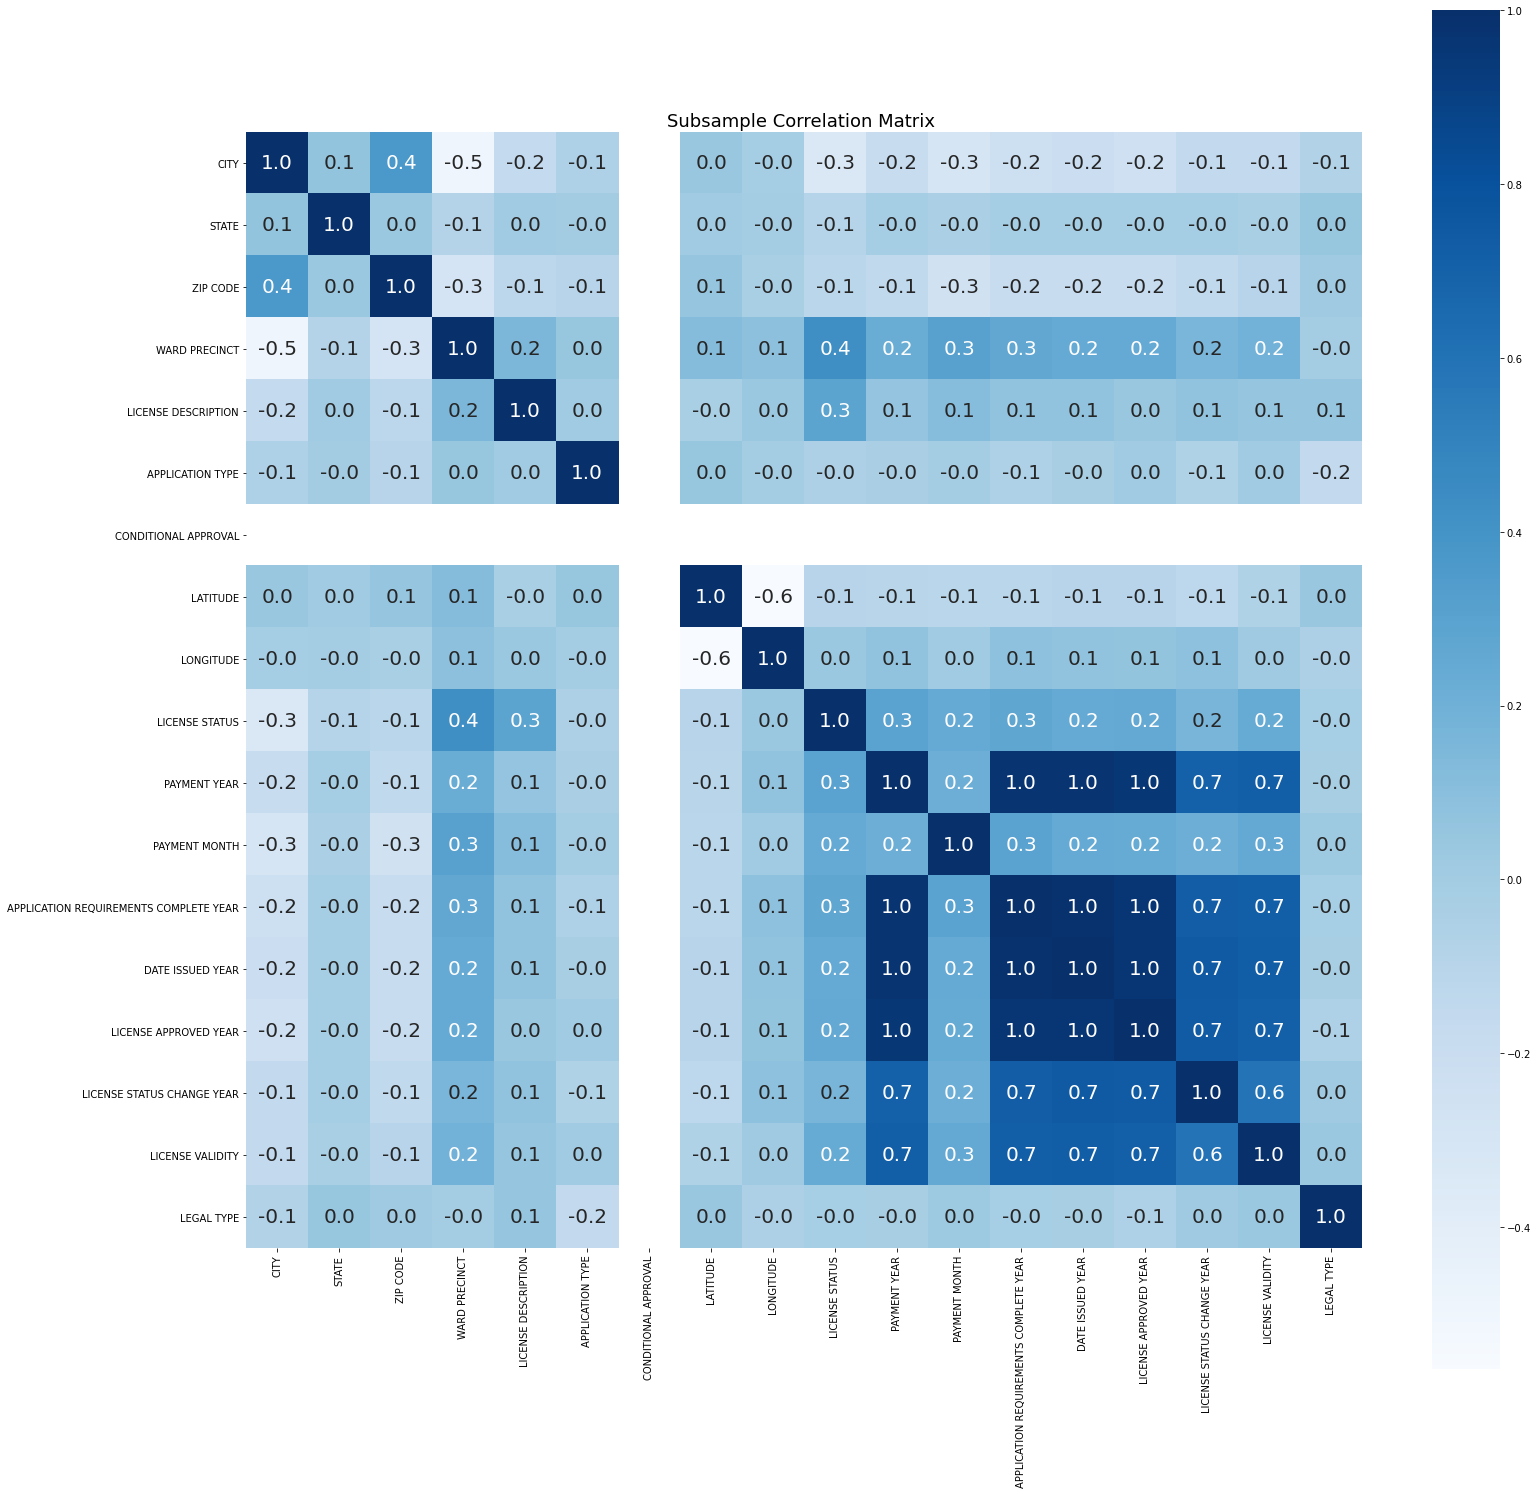

In [76]:
#Model training with this data

# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(25,25))

# Plotting heatmap to understand the correlation

sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix ', fontsize=18)
plt.show()

In [77]:
# To removes the unequired columns based on the correlation data
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

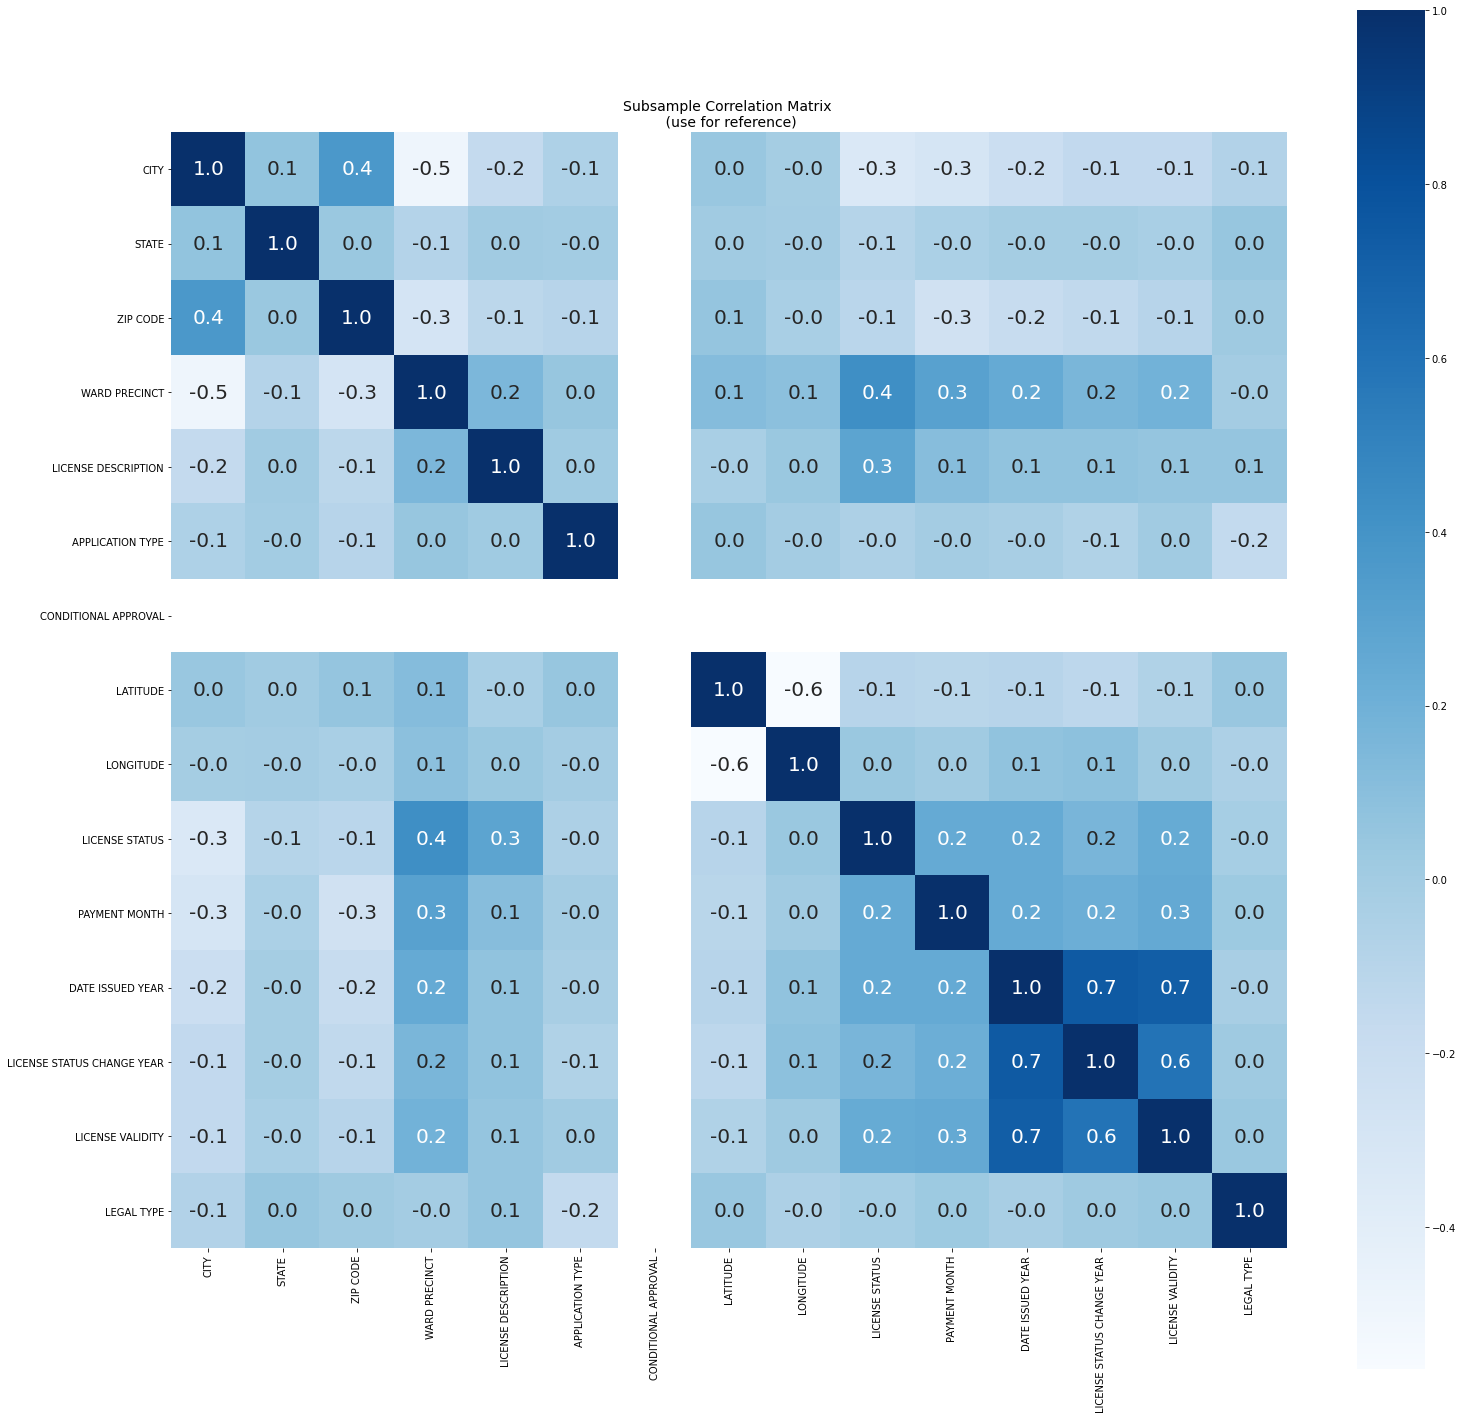

In [78]:
# Analyzing Subsample

sub_sample_corr = new_df.corr()

# Plotting heatmap to understand the correlation

plt.figure(figsize=(25,25))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [79]:
#undersampling to prevent overfiting

X = new_df.drop('LICENSE STATUS', axis=1)
y = new_df['LICENSE STATUS']

In [80]:
# Splitting the data to form the training dataset and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [81]:
X_train['ACCOUNT NUMBER']=pd.to_numeric(X_train['ACCOUNT NUMBER'])
X_train['SITE NUMBER']=pd.to_numeric(X_train['SITE NUMBER'])
X_train['WARD']=pd.to_numeric(X_train['WARD'])
X_train['PRECINCT']=pd.to_numeric(X_train['PRECINCT'])
X_train[ 'POLICE DISTRICT']=pd.to_numeric(X_train[ 'POLICE DISTRICT'])
X_train['LICENSE CODE']=pd.to_numeric(X_train['LICENSE CODE'])
X_train['LICENSE NUMBER']=pd.to_numeric(X_train['LICENSE NUMBER'])

<ipython-input-81-6c4445b9d728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ACCOUNT NUMBER']=pd.to_numeric(X_train['ACCOUNT NUMBER'])
<ipython-input-81-6c4445b9d728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SITE NUMBER']=pd.to_numeric(X_train['SITE NUMBER'])
<ipython-input-81-6c4445b9d728>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [82]:
X_test['ACCOUNT NUMBER']=pd.to_numeric(X_test['ACCOUNT NUMBER'])
X_test['SITE NUMBER']=pd.to_numeric(X_test['SITE NUMBER'])
X_test['WARD']=pd.to_numeric(X_test['WARD'])
X_test['PRECINCT']=pd.to_numeric(X_test['PRECINCT'])
X_test[ 'POLICE DISTRICT']=pd.to_numeric(X_test[ 'POLICE DISTRICT'])
X_test['LICENSE CODE']=pd.to_numeric(X_test['LICENSE CODE'])
X_test['LICENSE NUMBER']=pd.to_numeric(X_test['LICENSE NUMBER'])

<ipython-input-82-3dc24584ccbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ACCOUNT NUMBER']=pd.to_numeric(X_test['ACCOUNT NUMBER'])
<ipython-input-82-3dc24584ccbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['SITE NUMBER']=pd.to_numeric(X_test['SITE NUMBER'])
<ipython-input-82-3dc24584ccbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [83]:
# Extreme Gradient Boosting

from xgboost import XGBClassifier, plot_importance

# XGB Classifier
egbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# Train the model
egbm.fit(X_train, y_train)

C:\Users\91850\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:29:12] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:29:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_class=5,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [84]:
X_train.dtypes

ACCOUNT NUMBER                  int64
SITE NUMBER                     int64
CITY                            int32
STATE                           int32
ZIP CODE                        int32
WARD                          float64
PRECINCT                      float64
WARD PRECINCT                   int32
POLICE DISTRICT               float64
LICENSE CODE                    int64
LICENSE DESCRIPTION             int32
LICENSE NUMBER                float64
APPLICATION TYPE                int32
CONDITIONAL APPROVAL            int32
LATITUDE                      float64
LONGITUDE                     float64
PAYMENT MONTH                 float64
DATE ISSUED YEAR                int64
LICENSE STATUS CHANGE YEAR    float64
LICENSE VALIDITY              float64
LEGAL TYPE                      int32
dtype: object

In [85]:
egbm.fit(X_train, y_train)

[03:29:16] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:29:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_class=5,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [86]:
X_test.dtypes

ACCOUNT NUMBER                  int64
SITE NUMBER                     int64
CITY                            int32
STATE                           int32
ZIP CODE                        int32
WARD                          float64
PRECINCT                      float64
WARD PRECINCT                   int32
POLICE DISTRICT               float64
LICENSE CODE                    int64
LICENSE DESCRIPTION             int32
LICENSE NUMBER                float64
APPLICATION TYPE                int32
CONDITIONAL APPROVAL            int32
LATITUDE                      float64
LONGITUDE                     float64
PAYMENT MONTH                 float64
DATE ISSUED YEAR                int64
LICENSE STATUS CHANGE YEAR    float64
LICENSE VALIDITY              float64
LEGAL TYPE                      int32
dtype: object

In [87]:
# Prediction on testing data
y_pred = egbm.predict(X_test)

In [88]:
# Accuracy of Extreme Gradient Boosting
accuracy_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', accuracy_xgb )

Total Accuracy :  92.04


In [89]:
test_data.dtypes

ACCOUNT NUMBER                 object
SITE NUMBER                    object
CITY                            int32
STATE                           int32
ZIP CODE                        int32
WARD                           object
PRECINCT                       object
WARD PRECINCT                   int32
POLICE DISTRICT                object
LICENSE CODE                   object
LICENSE DESCRIPTION             int32
LICENSE NUMBER                 object
APPLICATION TYPE                int32
CONDITIONAL APPROVAL            int32
LATITUDE                      float64
LONGITUDE                     float64
PAYMENT MONTH                 float64
DATE ISSUED YEAR                int64
LICENSE STATUS CHANGE YEAR    float64
LICENSE VALIDITY              float64
LEGAL TYPE                      int32
dtype: object

In [90]:
test_data['ACCOUNT NUMBER']=pd.to_numeric(test_data['ACCOUNT NUMBER'])
test_data['SITE NUMBER']=pd.to_numeric(test_data['SITE NUMBER'])
test_data['WARD']=pd.to_numeric(test_data['WARD'])
test_data['PRECINCT']=pd.to_numeric(test_data['PRECINCT'])
test_data[ 'POLICE DISTRICT']=pd.to_numeric(test_data[ 'POLICE DISTRICT'])
test_data['LICENSE CODE']=pd.to_numeric(test_data['LICENSE CODE'])
test_data['LICENSE NUMBER']=pd.to_numeric(test_data['LICENSE NUMBER'])

In [91]:
# Prediction on the testing dataset
final_pred = egbm.predict(test_data)

In [92]:
my_submission['LICENSE STATUS'] = final_pred

In [93]:
# putting in the actual values due to prior encoding
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [94]:
# Saving the file for submission
my_submission.to_csv('required_submission___.csv', index=False)